  here are the link to the online file:'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'

In [ ]:
# count how many new cases

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import datetime
from datetime import date, timedelta

url_cases = 'casesstate.csv'

shortstate = {
'Johor': 'JHR',
'Kedah': 'KDH',
'Kelantan': 'KTN',
'Melaka': 'MLK',
'Negeri Sembilan': 'NSN',
'Pahang': 'PHG',
'Perak': 'PRK',
'Perlis': 'PLS',
'Pulau Pinang': 'PNG',
'Sabah': 'SBH',
'Sarawak': 'SWK',
'Selangor': 'SEL',
'Terengganu': 'TRG',
'Sel & WP': 'GKV',
'W.P. Kuala Lumpur': 'WPKL',
'W.P. Labuan': 'LBN',
'W.P. Putrajaya': 'WPP'
}

mergeKV = {'Selangor': 'Sel & WP', 'W.P. Kuala Lumpur': 'Sel & WP', 'W.P. Putrajaya': 'Sel & WP'}

def dfIsComplete(df):
    odf = df.copy()
    dff = df.groupby(['date', 'state']) \
        .sum() \
        .unstack(fill_value=0) \
        .asfreq('D', fill_value=0) \
        .stack() \
        .sort_index(level=1) \
        .reset_index() \
        .sort_values(by=['date', 'state'])
    dff.date = dff.date.dt.date

    assert len(odf) == len(dff)

df = pd.read_csv(url_cases, usecols=['date','state','cases_new'], parse_dates=['date'])
df = df.groupby(['date','state']).sum().reset_index()
df = df[df.date.dt.date >= date(2023,7,22) ] 

sum_cases_new = df["cases_new"].sum()
dfIsComplete(df)
print(df)
print('total new cases')
print(round(sum_cases_new))
dfIsComplete(df)

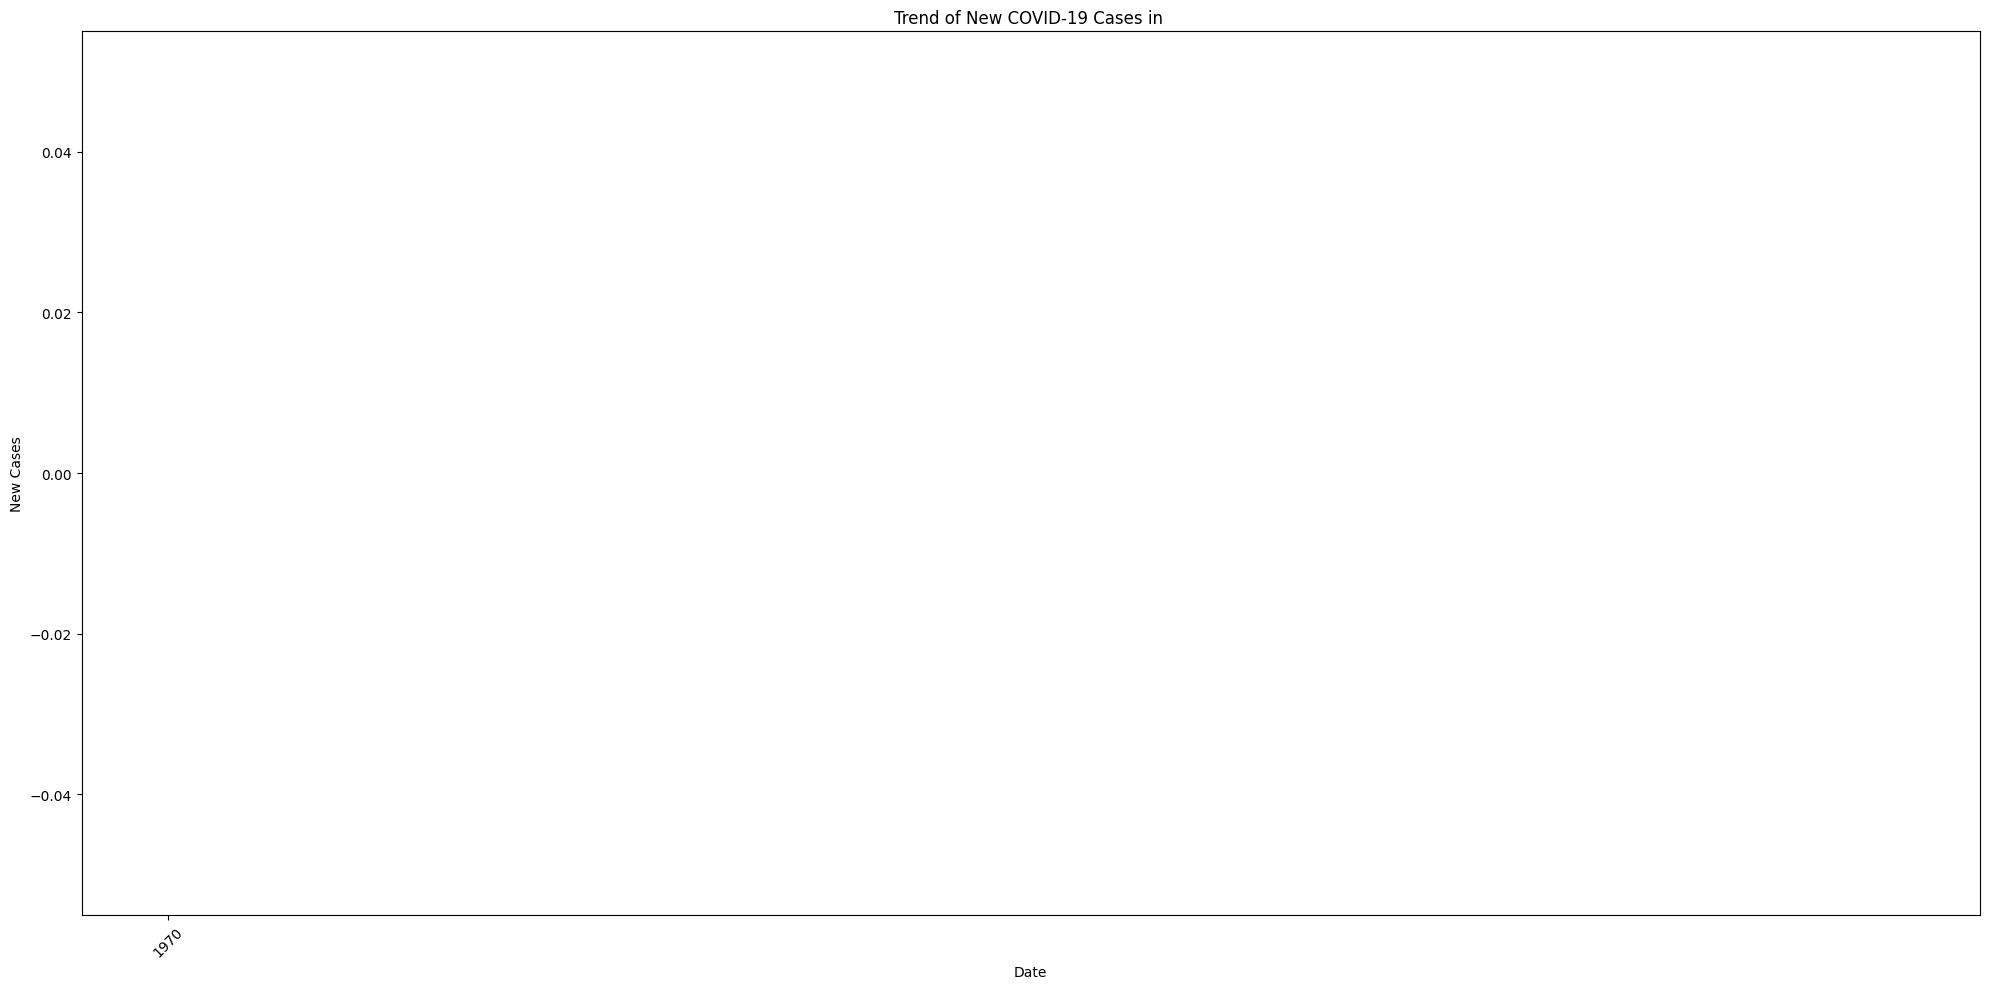

In [3]:
# plt graphy input the state name u want

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV_FILE to the CSV file
CSV_FILE = 'casesstate.csv'

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(CSV_FILE)
state_name = input('input state: ')

# Filter the data to get only the rows corresponding to state_data
state_data = df[df['state'] == state_name]

# Convert the date column to datetime format for better x-axis representation
state_data.loc[:, 'date'] = pd.to_datetime(state_data['date'])

# Get the new cases column for state_new_cases
state_new_cases = state_data['cases_new']

# Plot the graph
plt.figure(figsize=(20, 10))
plt.plot(state_data['date'], state_new_cases)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Trend of New COVID-19 Cases in ' + state_name)

# Set the major locator for years on the x-axis
years = mdates.YearLocator()
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
